<a href="https://colab.research.google.com/github/thangaraj123456/project1/blob/main/THANGARAJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Load data

import pandas as pd

# Load dataset (replace with your CSV filename if needed)
df = pd.read_csv("creditcard.csv")

# View shape and sample
print("Shape:", df.shape)
print(df.head())
print(df.info())

Shape: (284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26 

In [ ]:
# Step 2: Data Cleaning

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Remove duplicates
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
print(f"Removed {initial_rows - df.shape[0]} duplicate rows.")


Missing values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Removed 1081 duplicate rows.


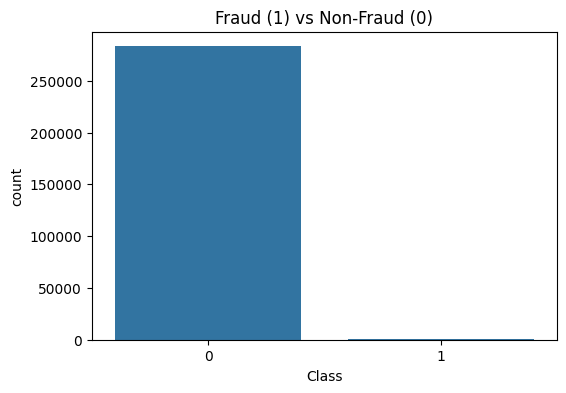

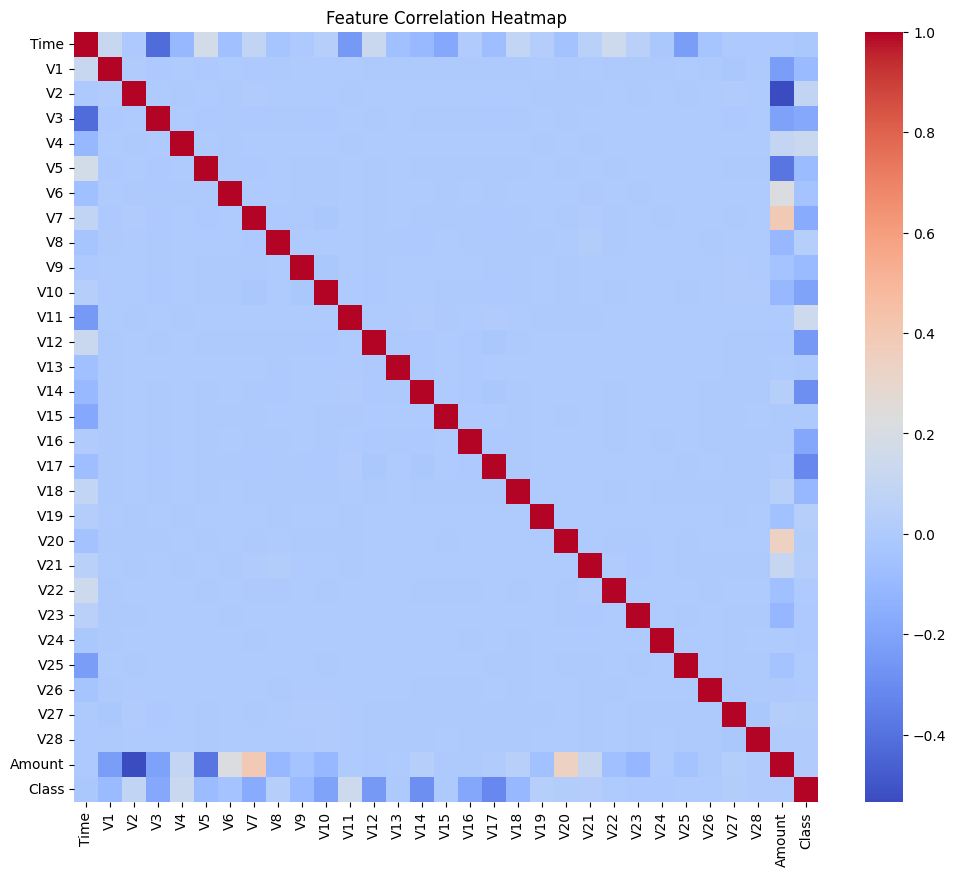

In [ ]:
# Step 3: EDA

import matplotlib.pyplot as plt
import seaborn as sns

# Fraud distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title("Fraud (1) vs Non-Fraud (0)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False, fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Step 4: Feature Engineering

from sklearn.preprocessing import StandardScaler

# Scale 'Amount' and 'Time' (optional, but often useful)
scaler = StandardScaler()
df[['scaled_amount', 'scaled_time']] = scaler.fit_transform(df[['Amount', 'Time']])
df.drop(['Amount', 'Time'], axis=1, inplace=True)

In [ ]:
# Step 5: Train-test split and model building

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df.drop('Class', axis=1)
y = df['Class']

# Stratified sampling to maintain class ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Try Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.85      0.59      0.70        95

    accuracy                           1.00     56746
   macro avg       0.92      0.79      0.85     56746
weighted avg       1.00      1.00      1.00     56746



ROC-AUC (5-fold): 0.9688185078454481


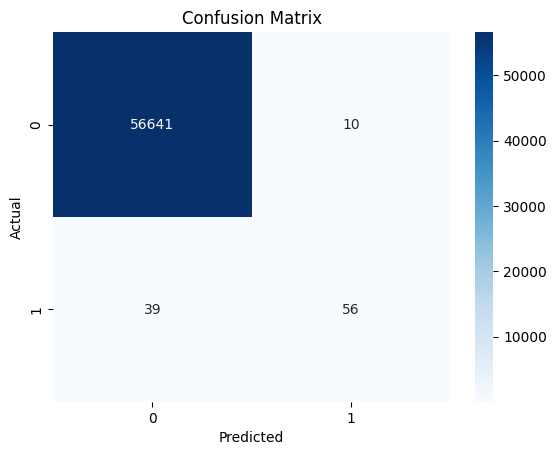

In [ ]:
# Step 6: Model evaluation

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, confusion_matrix

# Cross-validation ROC AUC
scores = cross_val_score(lr, X, y, cv=5, scoring='roc_auc')
print("ROC-AUC (5-fold):", scores.mean())

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


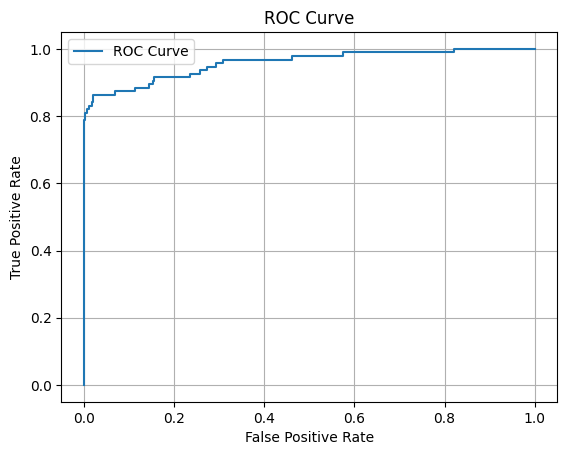

In [ ]:
# Step 7: Visualize precision, recall, ROC curve

from sklearn.metrics import roc_curve, precision_recall_curve

fpr, tpr, _ = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()